# Resultados de sociograma

In [1]:
import numpy as np
import math   
import matplotlib.pyplot as plt

## Uso

Si un integrante no desea votar a nadiese ingresa como si se hubiese votado a si mismo.

## Mejoras a realizar

- Que la función directamente tire los 3 gráficos juntos
- Cambiar la implementación de los votos para que el gráfico se compute a través de una matriz.
- Mostrar una lista con los más votados en orden descendiente
- Investigar que otras preguntas se pueden hacer u otras formas de mostrar/graficar los resultados.

## Preguntas del Sociograma

### I) ¿Con qué dos personas le gustaría trabajar en grupo?

Como resultado obtenemos los referentes del grupo. Los que se relacionan con todos, los más escuchados y los que marcan cierto liderazgo y/o son el apoyo emocional del grupo.

### II) ¿Cuáles son las personas que me gustaría conocer mejor?

Los no votados, o son íntimos de todos, o no son aceptados.
En este caso hay que estudiar el por qué, y también de hacer algo para mejorar la situación.

Presentar el afiche con el gráfico y la sociomatriz y se hace notar quiénes son los más votados y los menos votados.
No se hace ningún comentario sobre estos últimos.
Se explican las coherencias del dibujo, o sea las preferencias o rechazos.

### III) ¿Quiénes podrían darse a conocer más pero no se animan?

El objetivo es impulsar, dejar la invitación a que a partir de ahora cada uno asuma como protagonista la vida de la comunidad, ya no podemos esperar que nos llegue todo hecho, ahora es cada uno quién debe hacer su parte.
Asumir que otros me digan que puedo dar más y que tengo talentos me debe impulsar a dar todo de mi para ofrecerlo a la comunidad.

## Lista de integrantes

In [2]:
quintoP_dnis = np.array([47303601,  # 0 Maxi
                         47797531,  # 1 Vicente
                         47708394,  # 2 Masante
                         47708326,  # 3 Fabri
                         46587536,  # 4 Mati
                         51702027,  # 5 Negro
                         47474935,  # 6 Paris
                         47174994,  # 7 Joaco
                         47351717,  # 8 Gallo
                         47305409,  # 9 Lauti
                         47303819,  # 10 Medrano
                         46586677,  # 11 Oviedo
                         47722877,  # 12 Costi
                         47264202,  # 13 Ariza
                         47173704,  # 14 Cipri
                         47351988,  # 15 Luca
                         47303647  # 16 Paul
                         ])

quintoP_nombres = np.array(["Palavecino",  # 0 Maxi
                            "Arhex",  # 1 Vicente
                            "Masante",  # 2 Masante
                            "Silveyra",  # 3 Fabri
                            "Guzman",  # 4 Mati
                            "Coronel",  # 5 Negro
                            "Paris",  # 6 Paris
                            "Arce",  # 7 Joaco
                            "Gallo",  # 8 Gallo
                            "Cuesta",  # 9 Lauti
                            "Medrano",  # 10 Medrano
                            "Oviedo",  # 11 Oviedo
                            "Costilla",  # 12 Costi
                            "Ariza",  # 13 Ariza
                            "Cipriano",  # 14 Cipri
                            "Ramos",  # 15 Luca
                            "Michel"  # 16 Paul
                            ])


## Lista de aristas entre integrantes

In [3]:
# Sociograma I

aristas_quintoP_I = np.array([(0,4,1), 
                              (1,6,7), 
                              (2,6,3), 
                              (3,2,10), 
                              (4,1,0), 
                              (5,7,6), 
                              (6,14,7), 
                              (7,1,6), 
                              (8,3,2), 
                              (9,6,7), 
                              (10,3,2), 
                              (11,6,16), 
                              (12,3,6), 
                              (13,14,12), 
                              (14,13,6), 
                              (15,7,6), 
                              (16,6,1)])

aristas_quintoP_II = np.array([(0,16,6), 
                               (1,16,6), 
                               (2,16,2), # Votó a uno 
                               (3,3,3), # No votó
                               (4,1,16), 
                               (5,6,16), 
                               (6,15,4), 
                               (7,5,11), 
                               (8,8,8), # No votó
                               (9,6,3), 
                               (10,10,10), # No votó
                               (11,6,15), 
                               (12,3,9), 
                               (13,3,11), 
                               (14,2,14), # Votó a uno 
                               (15,16,6),
                               (16,1,11)])

aristas_quintoP_III = np.array([(0,16,6), # No votó
                                (1,10,2), 
                                (2,8,2), 
                                (3,8,3),
                                (4,8,16), # No votó
                                (5,3,8), 
                                (6,3,0), 
                                (7,13,6), 
                                (8,4,8), # No votó
                                (9,3,8), 
                                (10,3,2),
                                (11,0,15), 
                                (12,11,7), # No votó
                                (13,1,11), # No votó
                                (14,3,15), 
                                (15,6,15),
                                (16,3,7)])

## Cálculo de votos

In [4]:
def calculateVotes(members, edges):
  valueFirst = 2
  valueSecond = 1

  votes = np.zeros(len(members), dtype=int)
  for vote in edges:
    if vote[0] != vote[1]:
      votes[vote[1]] += valueFirst
    if vote[0] != vote[2]:
      votes[vote[2]] += valueSecond
  return votes

## Cálculo de pocisiones para circuscribir integrantes en circunferencia

In [5]:
def membersCoordinates(membersQuantity):
  deltaPi = (2 * math.pi) / membersQuantity
  x = []
  y = []
  for i in range(membersQuantity):
    x.append(math.cos(i * deltaPi))
    y.append(math.sin(i * deltaPi))
  x = np.array(x)
  y = np.array(y)
  return x, y

## Cálculo de pocisiones de aristas

In [6]:
def firstEdgesCoordinates(x, y, pairs):
  edgesx = []
  edgesy = []
  for pair in pairs:
    edgesx.append([x[pair[0]], x[pair[1]]])
    edgesy.append([y[pair[0]], y[pair[1]]])
  edgesx = np.array(edgesx)
  edgesy = np.array(edgesy)
  return edgesx, edgesy

def secondEdgesCoordinates(x, y, pairs):
  edgesx = []
  edgesy = []
  for pair in pairs:
    edgesx.append([x[pair[0]], x[pair[2]]])
    edgesy.append([y[pair[0]], y[pair[2]]])
  edgesx = np.array(edgesx)
  edgesy = np.array(edgesy)
  return edgesx, edgesy


## Mostrar gráfico de integrantes en circunferencia

In [7]:
def drawGraph(members, edges, title, color = True, showVotes=True):
  if color:
    colors = ("red", "blue")
    width = (1.2, 1)
    opacity = (1, 0.5)
  else:
    colors = ("black", "black")
    width = (1, 1)
    opacity = (1, 1)

  getVotes = lambda member, votes : (member, str(member) + "\n" + str(votes))[showVotes]
  
  membersx, membersy = membersCoordinates(len(members))
  firstx, firsty = firstEdgesCoordinates(membersx, membersy, edges)
  secondx, secondy = secondEdgesCoordinates(membersx, membersy, edges)
  votes = calculateVotes(members, edges)
  
  # Configuración de la figura
  plt.figure(figsize=(len(members)/2, len(members)/2))
  plt.xlim(-1.2, 1.2)
  plt.ylim(-1.2, 1.2)
  plt.axis('off')
  plt.axis('square')
  plt.title(title)

  # Ploteamos los integrantes
  for i in range(len(members)):
    plt.text(membersx[i], membersy[i], getVotes(members[i], votes[i]),
             bbox = {'facecolor': 'white', 'alpha': 0.9, 'boxstyle': "circle"},
             verticalalignment='center', horizontalalignment='center')

  # Ploteamos las aristas
  for i in range(len(firstx)):
    plt.plot(firstx[i], firsty[i], color=colors[0], linewidth=width[0], alpha=opacity[0])
    plt.plot(secondx[i], secondy[i], color=colors[1], linewidth=width[1], alpha=opacity[1])

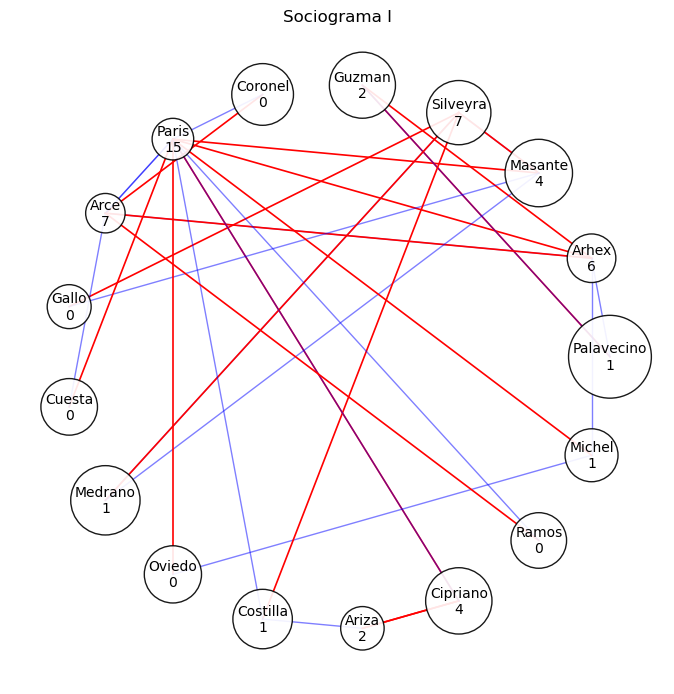

In [8]:
# Sociograma Usuarios
drawGraph(quintoP_nombres, aristas_quintoP_I, "Sociograma I")

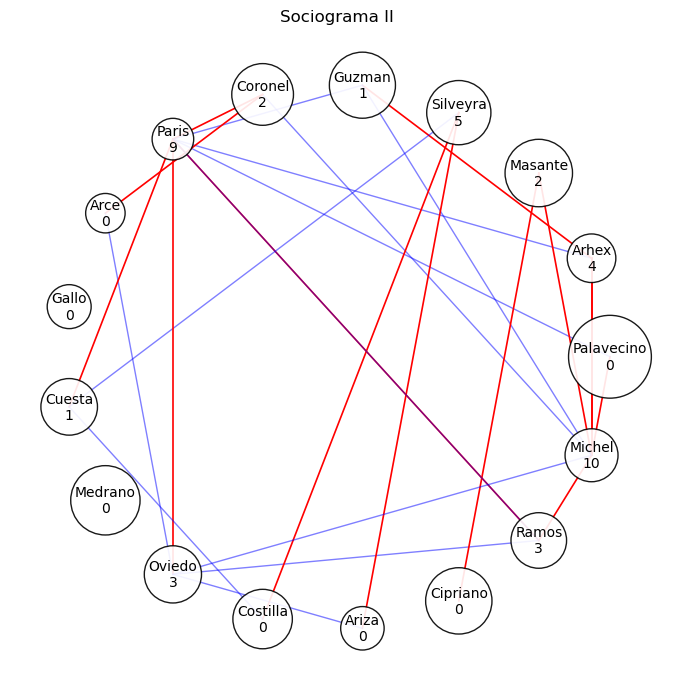

In [9]:
# Sociograma Usuarios
drawGraph(quintoP_nombres, aristas_quintoP_II, "Sociograma II")

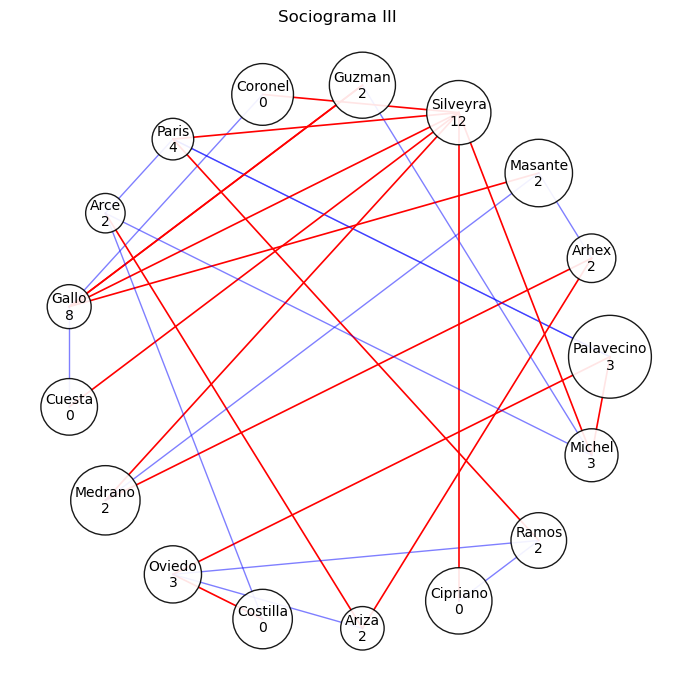

In [10]:
# Sociograma Usuarios
drawGraph(quintoP_nombres, aristas_quintoP_III, "Sociograma III")